# Allen Brain Atlas Developing Human Brain Sample (RNA-Seq)

Author: Moshe Silverstein <br/>
Date: 3-18 <br/>
Data Source: http://www.brainspan.org/static/download.html

In [2]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/RNA-Seq/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Mar 06 17:18:21 2018 EST

# Path to Output Files

In [6]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/RNA-Seq/Output/'

# Load Data

In [7]:
matrix = pd.read_csv('Input/genes_matrix_csv/expression_matrix.csv', header=None, index_col=0)

In [8]:
matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,515,516,517,518,519,520,521,522,523,524
0,,,,,,,,,,,,,,,,,,,,,
1,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
2,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
3,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
4,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
5,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [9]:
matrix.shape

(52376, 524)

# Load Sample Metadata

In [10]:
sample_meta = pd.read_csv('Input/genes_matrix_csv/columns_metadata.csv', index_col=0)

In [11]:
sample_meta.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex
2,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples)
3,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
4,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence
5,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...


# Load Gene Metadata

In [12]:
gene_meta = pd.read_csv('Input/genes_matrix_csv/rows_metadata.csv', index_col=0)

In [13]:
gene_meta.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,7062.0,ENSG00000000003,TSPAN6,7105.0
2,40735.0,ENSG00000000005,TNMD,64102.0
3,8736.0,ENSG00000000419,DPM1,8813.0
4,36423.0,ENSG00000000457,SCYL3,57147.0
5,35021.0,ENSG00000000460,C1orf112,55732.0


In [14]:
gene_meta.shape

(52376, 4)

# Map Sample Metadata to Sample ID

In [15]:
lst = []

for i,col in enumerate(matrix.columns):
    col_num = i+1
    sample = str(sample_meta.loc[col_num, 'structure_name'])+'_'+str(sample_meta.loc[col_num, 'age'])+'_'+ str(sample_meta.loc[col_num, 'gender'])+'_'+str(sample_meta.loc[col_num, 'donor_id'])
                       
    lst.append(sample)
    
matrix.columns = lst

In [16]:
matrix.head()

,occipital neocortex_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,amygdaloid complex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,posterior (caudal) superior temporal cortex (area 22c)_8 pcw_M_13058,upper (rostral) rhombic lip_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,...,primary auditory cortex (core)_40 yrs_F_12304,cerebellar cortex_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",orbital frontal cortex_40 yrs_F_12304,posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,posteroventral (inferior) parietal cortex_40 yrs_F_12304,"primary motor cortex (area M1, area 4)_40 yrs_F_12304",hippocampus (hippocampal formation)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304"
0,,,,,,,,,,,,,,,,,,,,,
1,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
2,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
3,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
4,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
5,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


# Map Gene to Row

In [17]:
matrix.index = gene_meta['gene_symbol']

In [18]:
matrix.index.name = ''

In [19]:
matrix.head()

,occipital neocortex_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,amygdaloid complex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,posterior (caudal) superior temporal cortex (area 22c)_8 pcw_M_13058,upper (rostral) rhombic lip_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,...,primary auditory cortex (core)_40 yrs_F_12304,cerebellar cortex_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",orbital frontal cortex_40 yrs_F_12304,posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,posteroventral (inferior) parietal cortex_40 yrs_F_12304,"primary motor cortex (area M1, area 4)_40 yrs_F_12304",hippocampus (hippocampal formation)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304"
,,,,,,,,,,,,,,,,,,,,,
TSPAN6,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
TNMD,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
DPM1,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
SCYL3,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
C1orf112,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


# Save Unfiltered Matrix to File

In [20]:
filename = path+'aba_dev_rnaseq_samp_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [21]:
normalized_matrix = matrix.copy()

In [22]:
normalized_matrix.head()

,occipital neocortex_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,amygdaloid complex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,posterior (caudal) superior temporal cortex (area 22c)_8 pcw_M_13058,upper (rostral) rhombic lip_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,...,primary auditory cortex (core)_40 yrs_F_12304,cerebellar cortex_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",orbital frontal cortex_40 yrs_F_12304,posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,posteroventral (inferior) parietal cortex_40 yrs_F_12304,"primary motor cortex (area M1, area 4)_40 yrs_F_12304",hippocampus (hippocampal formation)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304"
,,,,,,,,,,,,,,,,,,,,,
TSPAN6,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
TNMD,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
DPM1,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
SCYL3,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
C1orf112,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [23]:
normalized_matrix.shape

(52376, 524)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [24]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [25]:
normalized_matrix.shape

(38855, 524)

# Log2 Transform

In [26]:
normalized_matrix = mf.log2(normalized_matrix)

In [27]:
normalized_matrix.head()

,occipital neocortex_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,amygdaloid complex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,posterior (caudal) superior temporal cortex (area 22c)_8 pcw_M_13058,upper (rostral) rhombic lip_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,...,primary auditory cortex (core)_40 yrs_F_12304,cerebellar cortex_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",orbital frontal cortex_40 yrs_F_12304,posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,posteroventral (inferior) parietal cortex_40 yrs_F_12304,"primary motor cortex (area M1, area 4)_40 yrs_F_12304",hippocampus (hippocampal formation)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304"
TSPAN6,5.226783,4.658283,4.345572,4.841400,4.392196,3.970916,4.835323,4.135878,5.510576,5.521802,...,1.731588,1.475888,1.712534,1.502197,1.353716,1.623841,2.165007,2.540221,2.012377,2.029566
TNMD,0.062234,0.094017,0.153085,0.195935,0.245116,0.390866,0.153085,0.153085,0.559571,0.240278,...,0.814404,0.153085,0.086606,0.038262,0.138410,0.189888,0.379151,0.171881,0.153085,0.510085
DPM1,5.144586,4.443982,4.302681,4.546363,4.338313,3.587409,4.722171,4.222753,5.083345,5.291219,...,4.630473,4.402049,4.396657,4.135484,4.306227,4.500247,4.858285,4.893931,4.144013,4.900434
SCYL3,2.427428,2.386127,1.828561,2.202814,1.981479,1.767732,2.205906,1.837513,2.164727,2.204714,...,1.374627,1.358046,1.405214,1.692189,1.604226,1.660719,1.186090,1.127479,1.451846,1.322138
C1orf112,2.309502,2.176576,1.603029,2.165762,1.667772,0.999779,2.163999,1.458155,2.245368,2.189239,...,0.663106,0.845892,0.684497,0.655860,0.683872,0.751571,0.580227,0.816612,0.820879,0.554696


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [28]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [29]:
normalized_matrix.head()

,occipital neocortex_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,amygdaloid complex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,posterior (caudal) superior temporal cortex (area 22c)_8 pcw_M_13058,upper (rostral) rhombic lip_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,...,primary auditory cortex (core)_40 yrs_F_12304,cerebellar cortex_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",orbital frontal cortex_40 yrs_F_12304,posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,posteroventral (inferior) parietal cortex_40 yrs_F_12304,"primary motor cortex (area M1, area 4)_40 yrs_F_12304",hippocampus (hippocampal formation)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304"
TSPAN6,4.946887,4.496292,4.171544,4.605324,4.208949,3.861627,4.613033,4.026760,5.252112,5.170083,...,1.881484,1.546679,1.694628,1.562609,1.373520,1.710180,2.387218,2.784525,1.949217,2.141495
TNMD,0.069855,0.105250,0.159660,0.220311,0.261020,0.390958,0.171967,0.168416,0.595886,0.254855,...,0.861962,0.132378,0.083479,0.040956,0.144317,0.203627,0.373074,0.170121,0.148534,0.515522
DPM1,4.844502,4.269782,4.125504,4.344710,4.155874,3.452939,4.490930,4.108773,4.838092,4.967244,...,4.517090,4.417961,4.429446,4.165658,4.334977,4.544859,4.681795,4.761670,4.174600,4.661932
SCYL3,2.214087,2.110741,1.685856,2.034293,1.745668,1.635089,2.034515,1.859603,2.001090,2.088049,...,1.508120,1.411003,1.372095,1.759209,1.637556,1.751145,1.342930,1.322765,1.338258,1.409954
C1orf112,2.105242,1.911024,1.473570,2.002650,1.475725,0.928149,1.994941,1.521599,2.077464,2.070888,...,0.687427,0.832202,0.661253,0.678436,0.700340,0.802339,0.597547,0.932114,0.725134,0.563731


# Normalize Matrix (z-score the rows)

In [30]:
mf.zscore(normalized_matrix, 'row')

In [31]:
normalized_matrix.head()

,occipital neocortex_8 pcw_M_13058,primary motor-sensory cortex (samples)_8 pcw_M_13058,amygdaloid complex_8 pcw_M_13058,medial ganglionic eminence_8 pcw_M_13058,posterior (caudal) superior temporal cortex (area 22c)_8 pcw_M_13058,upper (rostral) rhombic lip_8 pcw_M_13058,caudal ganglionic eminence_8 pcw_M_13058,dorsal thalamus_8 pcw_M_13058,anterior (rostral) cingulate (medial prefrontal) cortex_8 pcw_M_13058,dorsolateral prefrontal cortex_8 pcw_M_13058,...,primary auditory cortex (core)_40 yrs_F_12304,cerebellar cortex_40 yrs_F_12304,"primary visual cortex (striate cortex, area V1/17)_40 yrs_F_12304",orbital frontal cortex_40 yrs_F_12304,posterior (caudal) superior temporal cortex (area 22c)_40 yrs_F_12304,posteroventral (inferior) parietal cortex_40 yrs_F_12304,"primary motor cortex (area M1, area 4)_40 yrs_F_12304",hippocampus (hippocampal formation)_40 yrs_F_12304,striatum_40 yrs_F_12304,"primary somatosensory cortex (area S1, areas 3,1,2)_40 yrs_F_12304"
TSPAN6,2.481762,1.964784,1.592192,2.089879,1.635108,1.236617,2.098723,1.426077,2.831955,2.737841,...,-1.035251,-1.419381,-1.249636,-1.401105,-1.618051,-1.231793,-0.455010,0.000830,-0.957539,-0.736934
TNMD,-1.050735,-0.530026,0.270423,1.162692,1.761577,3.673157,0.451471,0.399241,6.687950,1.670882,...,10.602326,-0.130935,-0.850314,-1.475883,0.044704,0.917248,3.410054,0.424322,0.106749,5.505684
DPM1,2.937816,1.566944,1.222799,1.745669,1.295240,-0.381462,2.094446,1.182890,2.922528,3.230593,...,2.156844,1.920394,1.947788,1.318577,1.722454,2.223082,2.549713,2.740238,1.339907,2.502334
SCYL3,1.972960,1.616378,0.150357,1.352602,0.356731,-0.024810,1.353369,0.749853,1.238037,1.538081,...,-0.462902,-0.797994,-0.932241,0.403453,-0.016298,0.375631,-1.032873,-1.102450,-1.048993,-0.801613
C1orf112,4.311829,3.661702,2.197364,3.968414,2.204577,0.371615,3.942609,2.358135,4.218845,4.196834,...,-0.434180,0.050440,-0.521796,-0.464277,-0.390956,-0.049522,-0.735048,0.384887,-0.307959,-0.848242


# Merge Like Column (by taking the mean)

In [32]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [33]:
normalized_matrix.shape

(38855, 524)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [34]:
mf.mapgenesymbols(normalized_matrix)

In [35]:
normalized_matrix.shape

(23269, 524)

# Merge Duplicate Genes By Rows

In [36]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [37]:
normalized_matrix.shape

(22411, 524)

# Histogram of First Sample

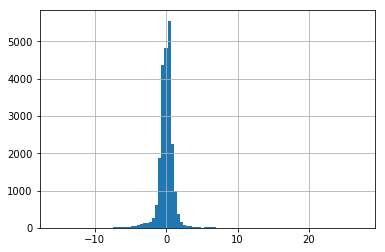

In [38]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

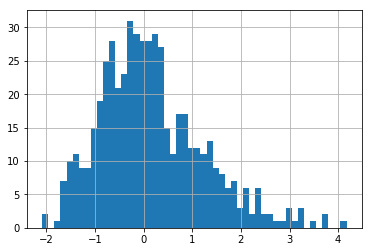

In [41]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=50)

# Save Filtered Matrix

In [40]:
filename = path+'aba_dev_rnaseq_samp_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [42]:
gene_list = mf.createGeneList(normalized_matrix)

In [43]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A2ML1-AS1,1.00874e+08


In [44]:
gene_list.shape

(22411, 2)

# Save Gene List

In [45]:
filename = path+'aba_dev_rnaseq_samp_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [46]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

In [47]:
for index in metaData.index:
    metaData.loc[index, 'Structure'] = index.split('_')[0]
    metaData.loc[index, 'Age'] = index.split('_')[1]
    metaData.loc[index, 'Gender'] = index.split('_')[2]
    metaData.loc[index, 'Donor ID'] = index.split('_')[3]

In [48]:
metaData.head()

,Structure,Age,Gender,Donor ID
amygdaloid complex_1 yrs_F_12830,amygdaloid complex,1 yrs,F,12830
amygdaloid complex_11 yrs_F_12289,amygdaloid complex,11 yrs,F,12289
amygdaloid complex_12 pcw_F_12835,amygdaloid complex,12 pcw,F,12835
amygdaloid complex_12 pcw_F_12960,amygdaloid complex,12 pcw,F,12960
amygdaloid complex_12 pcw_F_13060,amygdaloid complex,12 pcw,F,13060


In [49]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [50]:
attribute_list.head()

,Structure,Age,Gender,Donor ID
Attributes,,,,
amygdaloid complex_1 yrs_F_12830,amygdaloid complex,1 yrs,F,12830
amygdaloid complex_11 yrs_F_12289,amygdaloid complex,11 yrs,F,12289
amygdaloid complex_12 pcw_F_12835,amygdaloid complex,12 pcw,F,12835
amygdaloid complex_12 pcw_F_12960,amygdaloid complex,12 pcw,F,12960
amygdaloid complex_12 pcw_F_13060,amygdaloid complex,12 pcw,F,13060


In [51]:
attribute_list.shape

(524, 4)

# Save Attribute List

In [52]:
filename = path+'aba_dev_rnaseq_samp_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [53]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [54]:
standard_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_11 yrs_F_12289,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_F_12834,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,...,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 pcw_M_263195015,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12889,ventrolateral prefrontal cortex_4 mos_M_12890,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841,ventrolateral prefrontal cortex_8 yrs_M_12981
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.292799,0.212674,-0.752843,-0.474261,-0.527698,-0.275831,-0.329249,-0.600193,0.021827,-0.245311,...,-0.004867,0.834879,-0.081181,0.663058,0.506570,0.777594,-0.756667,-0.703224,0.796709,-0.249127
A1CF,0.385535,-0.179315,0.595438,0.042031,-0.858590,-0.431175,0.740528,0.664153,-0.251847,-0.545658,...,0.042031,-0.847131,0.893293,-0.442632,-0.022857,-0.476966,-0.740283,0.450407,-0.850962,0.962078
A2M,0.348078,-0.060275,-0.720483,-0.751014,-0.800626,-0.834975,-0.976084,-0.850242,0.558009,-0.022134,...,0.577091,0.752701,0.286999,0.897826,0.092354,-0.014497,-0.178598,-0.670880,-0.315988,-0.197679
A2ML1,0.617925,0.278203,0.167512,-0.416357,-0.672039,-0.374378,-0.156856,-0.160684,0.820268,0.663721,...,0.198087,0.346898,0.209511,0.927229,0.621737,0.194241,-0.061433,0.411787,0.591181,0.087380
A2ML1-AS1,-0.406277,0.502054,0.345539,0.815104,0.410433,-0.142953,0.551678,-0.009380,-0.058991,-0.066610,...,-0.555093,0.051679,-0.650503,0.414252,0.105117,-0.551275,-0.536020,0.223419,-0.608525,-0.856571


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

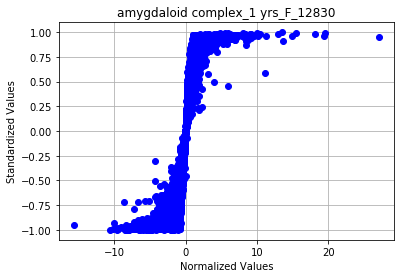

In [55]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [56]:
filename = path+'aba_dev_rnaseq_samp_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [58]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [59]:
tertiary_matrix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_11 yrs_F_12289,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_F_12834,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,...,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 pcw_M_263195015,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12889,ventrolateral prefrontal cortex_4 mos_M_12890,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841,ventrolateral prefrontal cortex_8 yrs_M_12981
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A2M,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [60]:
filename = path+'aba_dev_rnaseq_samp_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [61]:
name = 'aba_dev_rnaseq_samp_gene_up_set'

In [62]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [63]:
name = 'aba_dev_rnaseq_samp_gene_down_set'

In [64]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [65]:
name = 'aba_dev_rnaseq_samp_attribute_up_set'

In [66]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [67]:
name = 'aba_dev_rnaseq_samp_attribute_down_set'

In [68]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [69]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [70]:
attribute_similarity_matix.head()

,amygdaloid complex_1 yrs_F_12830,amygdaloid complex_11 yrs_F_12289,amygdaloid complex_12 pcw_F_12835,amygdaloid complex_12 pcw_F_12960,amygdaloid complex_12 pcw_F_13060,amygdaloid complex_13 pcw_F_12834,amygdaloid complex_13 pcw_M_12820,amygdaloid complex_13 pcw_M_12888,amygdaloid complex_13 yrs_F_12831,amygdaloid complex_15 yrs_M_12299,...,ventrolateral prefrontal cortex_36 yrs_M_12302,ventrolateral prefrontal cortex_37 pcw_M_263195015,ventrolateral prefrontal cortex_37 yrs_M_12303,ventrolateral prefrontal cortex_4 mos_M_12889,ventrolateral prefrontal cortex_4 mos_M_12890,ventrolateral prefrontal cortex_4 yrs_M_12298,ventrolateral prefrontal cortex_40 yrs_F_12304,ventrolateral prefrontal cortex_8 pcw_M_13058,ventrolateral prefrontal cortex_8 yrs_M_12841,ventrolateral prefrontal cortex_8 yrs_M_12981
,,,,,,,,,,,,,,,,,,,,,
amygdaloid complex_1 yrs_F_12830,1.000000,0.158332,-0.100433,-0.055529,-0.053192,-0.068949,-0.097430,-0.090801,0.149997,0.290574,...,0.131316,0.059687,0.144687,0.090293,0.158888,-0.025727,0.134427,-0.141139,0.058179,0.108160
amygdaloid complex_11 yrs_F_12289,0.158332,1.000000,-0.068186,-0.063065,0.011791,-0.093951,-0.088236,-0.050008,0.147163,0.254038,...,0.081780,-0.048184,0.102573,0.000457,0.068376,0.116825,0.156046,-0.052864,0.094985,0.075314
amygdaloid complex_12 pcw_F_12835,-0.100433,-0.068186,1.000000,0.540453,0.575755,0.593133,0.410790,0.609260,-0.136729,-0.094463,...,-0.177108,-0.018262,-0.181665,-0.039869,-0.086600,-0.070278,-0.140459,0.541406,-0.077391,-0.104934
amygdaloid complex_12 pcw_F_12960,-0.055529,-0.063065,0.540453,1.000000,0.556121,0.449313,0.370164,0.458550,-0.137084,-0.071546,...,-0.150199,-0.009948,-0.169668,-0.115262,-0.044409,-0.120391,-0.100432,0.363622,-0.134668,-0.074756
amygdaloid complex_12 pcw_F_13060,-0.053192,0.011791,0.575755,0.556121,1.000000,0.425830,0.350932,0.528784,-0.149213,0.012222,...,-0.145951,-0.069979,-0.169641,-0.111083,-0.030642,-0.014933,-0.028265,0.470406,-0.051376,-0.039919


# Save Attribute Similarity Matrix

In [71]:
filename = path+'aba_dev_rnaseq_samp_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [73]:
# net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# # net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

# Create Gene Similarity Matrix

In [74]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [75]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.030434,0.215634,0.254060,-0.243430,0.155887,0.060022,0.481324,0.013343,-0.079866,...,-0.428977,-0.348148,-0.420579,-0.509831,-0.376203,-0.151734,-0.513857,0.076088,-0.389668,-0.611538
A1CF,-0.030434,1.000000,-0.060175,-0.050491,-0.013816,-0.023438,0.116966,-0.050590,0.196200,-0.044530,...,0.104380,0.070029,0.032415,0.078362,-0.026626,0.101840,0.059532,-0.025504,-0.020584,-0.007132
A2M,0.215634,-0.060175,1.000000,0.568164,-0.517785,0.172146,-0.075547,0.641657,0.046830,-0.410645,...,-0.739409,-0.460466,-0.667228,-0.593271,-0.500928,-0.118124,-0.411797,0.025088,-0.172899,-0.569913
A2ML1,0.254060,-0.050491,0.568164,1.000000,-0.148773,0.160947,-0.013513,0.651413,0.079522,-0.209252,...,-0.602339,-0.152862,-0.398709,-0.583923,-0.273189,-0.091835,-0.601731,-0.083357,-0.253206,-0.307774
A2ML1-AS1,-0.243430,-0.013816,-0.517785,-0.148773,1.000000,-0.006956,0.064224,-0.284060,-0.030566,0.370001,...,0.590519,0.233909,0.667420,0.431110,0.536104,0.182784,0.234795,0.074484,0.187684,0.635055


# Save Gene Similarity Matrix

In [76]:
filename = path+'aba_dev_rnaseq_samp_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [77]:
name = 'aba_dev_rnaseq_samp_gene_attribute_edge_list'

In [78]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  524 Out of 524   

 The number of statisticaly relevent gene-attribute associations is: 587286
